# Breast Cancer Analysis
## Heat Propagation and Clustering Package
### Python 2 Compatible Version


----------------------

Author: Mikayla Webster (13webstermj@gmail.com)

Date: 2nd May, 2018

----------------------

<a id='toc'></a>
## Table of Contents
1. [Background](#background)
2. [Import packages](#import)
3. [Define Analysis Preferences](#pref)
3. [Load Networks](#load)
4. [Run Heat Propagation](#heat)
5. [Clustering](#cluster)

## Background
<a id='background'></a>

This notebook performs heat propagation and clustering analysis on a set of differentially expressed genes taken from breast cancer samples. This notebook loads the mammory gland GIANT database, filtered for a confidence of 0.2, from NDEXbio. [NDEXbio](http://ndexbio.org/#/) is a network hosting site that eliminates the need for user to download large and unwieldy network files. You can find all of our available networks [here](http://ndexbio.org/#/user/9f248194-480b-11e8-a935-0ac135e8bacf).

## Import packages
<a id='import'></a>

In [1]:
import sys
code_path = '../../network_bio_toolkit'
sys.path.append(code_path)

import Heat2
reload(Heat2)

<module 'Heat2' from '../../network_bio_toolkit\Heat2.pyc'>

## Define Analysis Preferences
<a id='pref'></a>

In [2]:
symbol = 'symbol'
entrez = 'entrez'

human = 'human'
mouse = 'mouse'

heat = Heat2.Heat(gene_type = symbol, species = human)

## Load Networks
<a id='load'></a>

1. Load DEG file 
2. Load STRING background network

In [3]:
# load DEG file
DEG_filename = "../../DEG_databases/geo2r_GSE11352_brca_48hours.txt"  
heat.create_DEG_list(DEG_filename, p_value_filter = 0.05, sep = '\t')

print('Number of DEG\'s: ' + str(len(heat.DEG_list)))

../../network_bio_toolkit\create_graph.py:366: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df = pd.DataFrame.from_csv(filename, sep = sep)


Number of DEG's: 171


Warning! The GIANT networks are very large, therefore take a bit of time to load. 

In [4]:
heat.load_ndex_from_server(UUID = 'f8420fb5-74bd-11e8-a4bf-0ac135e8bacf', relabel_node_field = 'name')

print('\nNumber of interactions: ' + str(len(list(heat.DG_universe.edges()))))


Number of interactions: 775722


In [5]:
# for testing purposes only. Not required for analysis.
saved_DG_universe = heat.DG_universe
heat.DG_universe = saved_DG_universe

## Run Heat Propagation
<a id='heat'></a>

In [6]:
heat.normalized_adj_matrix()

In [7]:
# for testing purposes only. Not required for analysis. 
saved_Wprime = heat.Wprime
heat.Wprime = saved_Wprime

In [8]:
heat.draw_heat_prop(num_nodes = 200,
                  random_walk = True,
                  edge_width = 2,
                  edge_smooth_enabled = True,
                  edge_smooth_type = 'bezier',
                  node_size_multiplier = 5,
                  hover = False,
                  hover_connected_edges = False,
                  largest_connected_component = True,
                  physics_enabled = True,
                  node_font_size = 40,
                  graph_id = 1,
                  node_shadow_x = 6)

## Clustering 
<a id='cluster'></a>

Parameter information:
- **G_DEG**: background network filtered by DEG list, output of load_STRING_to_digraph
- **DG_universe**: full background network, output of create_graph.load_STRING_to_digraph 
- **seed_nodes**: list of DEG's, output of create_graph.create_DEG_list
- **Wprime**: will calculate automatically of not specified, output of visualizations.normalized_adj_matrix
- **num_top_genes**: number of genes to display in the output graph
- **cluster_size_cut_off**: color clusters below this threshhold grey
- **remove_stray_nodes**: remove custers below the cluster size cut off
- **r**: increases spacing between clusters. recommended number between 0.5 and 4.0
- **x_offset**: modify if some clusters are overlapping. Extra helpful when x_offset != y_offset
- **y_offset**: modify if some clusters are overlapping. Extra helpful when x_offset != y_offset
- **node_spacing**: recommended number between 500 and 2000
- **node_size_multiplier**: as you scale node_spacing, scale this number. Recommended number between 5 and 25
- **physics_enabled**: Nodes will bounce aroound when you click and drag them. Only set to True when number of nodes is 200 or less
- **node_font_size**: as you scale node_spacing, scale this number. Recommended number between 20 and 50
- **graph_id**: Allows rendering of multiple graphs in one notebook. Just make sure each graph has a unique id. 

In [32]:
heat.draw_clustering(rad_positions = False,
                k = None,
                largest_connected_component = True,
                num_top_genes = 200,
                cluster_size_cut_off = 5,
                remove_stray_nodes = True,
                node_spacing = 700,
                node_size_multiplier = 10,
                physics_enabled = True,
                node_font_size = 40,
                graph_id = 2,
                edge_width = 2,
                edge_smooth_enabled = True,
                edge_smooth_type = 'bezier',
                hover = False,
                hover_connected_edges = False,
               )

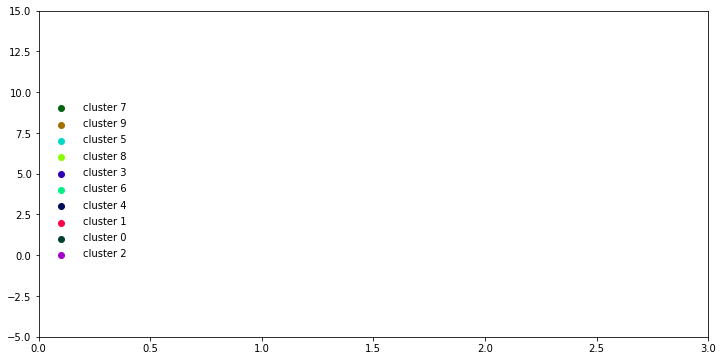

In [30]:
heat.cluster_legend(cluster_size_cut_off = 0)

In [31]:
heat.draw_clustering(rad_positions = True,
                k = None,
                largest_connected_component = True,
                num_top_genes = 200,
                cluster_size_cut_off = 5,
                remove_stray_nodes = True,
                node_spacing = 700,
                node_size_multiplier = 10,
                physics_enabled = False,
                node_font_size = 40,
                graph_id = 3,
                edge_width = 2,
                edge_smooth_enabled = True,
                edge_smooth_type = 'bezier',
                hover = False,
                hover_connected_edges = False,
                color_lfc = True,
                vmin = -5,
                vmax = 5,
               )